In [2]:
import pandas as pd
import json
import seaborn as sns

In [3]:
# Step 1: Load the JSON file
with open('P1- BankStatements.json', 'r') as f:
    data = json.load(f)

# Step 2: Explore the structure of the data
account_summary = data['Account']['Summary']
transactions = data['Account']['Transactions']['Transaction']

# Step 3: Convert to DataFrame for easier analysis
df_transactions = pd.DataFrame(transactions)

# Convert amount and currentBalance to numeric
df_transactions['amount'] = pd.to_numeric(df_transactions['amount'])
df_transactions['currentBalance'] = pd.to_numeric(df_transactions['currentBalance'])

# Convert transactionTimestamp to datetime
df_transactions['transactionTimestamp'] = pd.to_datetime(df_transactions['transactionTimestamp'])


In [4]:
df_transactions.head()

,type,mode,amount,currentBalance,transactionTimestamp,valueDate,txnId,narration,reference
0,DEBIT,CARD,100.0,2180.8,2023-06-27 09:40:19+05:30,2023-06-27,S39488701,PRCR/MS NEHA FILLING STATIO/FARRUKHAB,NA
1,DEBIT,CARD,170.0,2010.8,2023-06-28 09:51:57+05:30,2023-06-28,S76862822,PRCR/MS NEHA FILLING STATIO/FARRUKHAB,NA
2,DEBIT,CARD,500.0,1510.8,2023-07-26 10:04:00+05:30,2023-07-26,S31451661,PRCR/MS NEHA FILLING STATIO/FARRUKHAB,NA
3,CREDIT,OTHERS,15.0,1525.8,2023-08-06 11:10:38+05:30,2023-07-31,S66463256,51888100006461IntPd01-05-2023 to 31-07-2023,NA
4,DEBIT,ATM,1000.0,525.8,2023-08-07 17:13:13+05:30,2023-08-07,S18475743,ATM/CASH/321917012791/XXXXXXXXXXXX8896,NA


In [5]:
df_transactions.columns

Index(['type', 'mode', 'amount', 'currentBalance', 'transactionTimestamp',
       'valueDate', 'txnId', 'narration', 'reference'],
      dtype='object')

In [8]:
len(df_transactions)

985

In [25]:
small_threshold=500
df_transactions['transaction_amount_category'] = df_transactions['amount'].apply(lambda x: 'Small' if x <= small_threshold else 'Large')

# Calculate distribution
transaction_amount_distribution = df_transactions['transaction_amount_category'].value_counts()

# Print the distribution
print("Threshold value: 500")
print('Distribution of Transaction Amounts:')
print(transaction_amount_distribution)

Threshold value: 500
Distribution of Transaction Amounts:
transaction_amount_category
Small    745
Large    240
Name: count, dtype: int64


In [29]:
value_mode= df_transactions['type'].value_counts()
value_mode


type
DEBIT     695
CREDIT    290
Name: count, dtype: int64

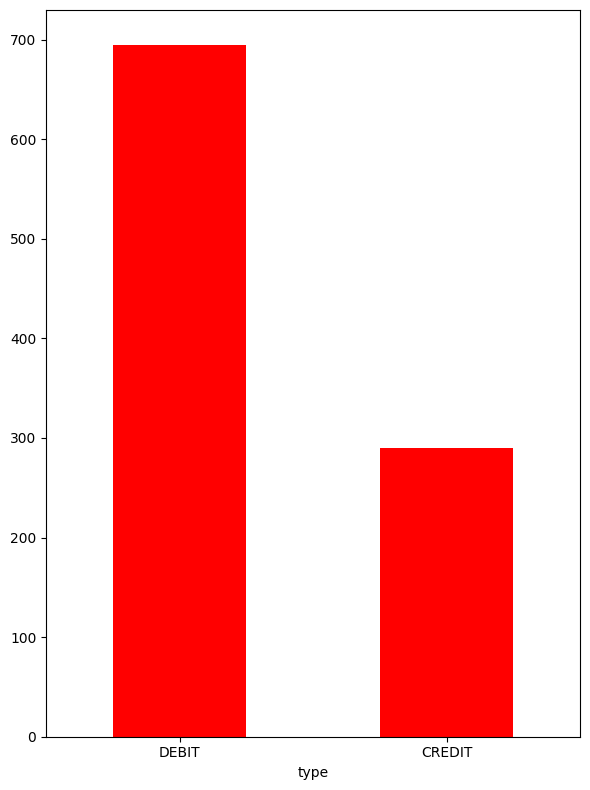

In [32]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,8))
value_mode.plot(kind='bar',color='red')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

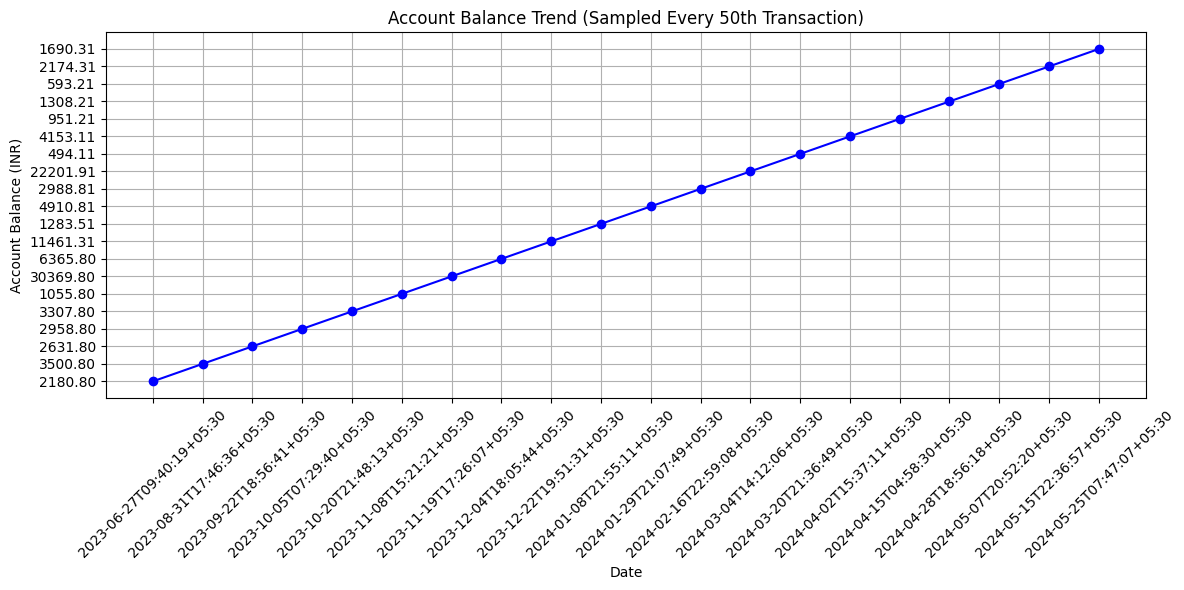

In [39]:
sampled_data = df_transactions.iloc[::50]  # Select every 10th row

# Step 4: Plot the account balance trend over time
plt.figure(figsize=(12, 6))  # Increase figure size for clarity
plt.plot(sampled_data['transactionTimestamp'], sampled_data['currentBalance'], marker='o', linestyle='-', color='b')
plt.title('Account Balance Trend (Sampled Every 50th Transaction)')
plt.xlabel('Date')
plt.ylabel('Account Balance (INR)')
plt.xticks(rotation=45)
plt.grid(True)  # Add gridlines
plt.tight_layout()
plt.show()

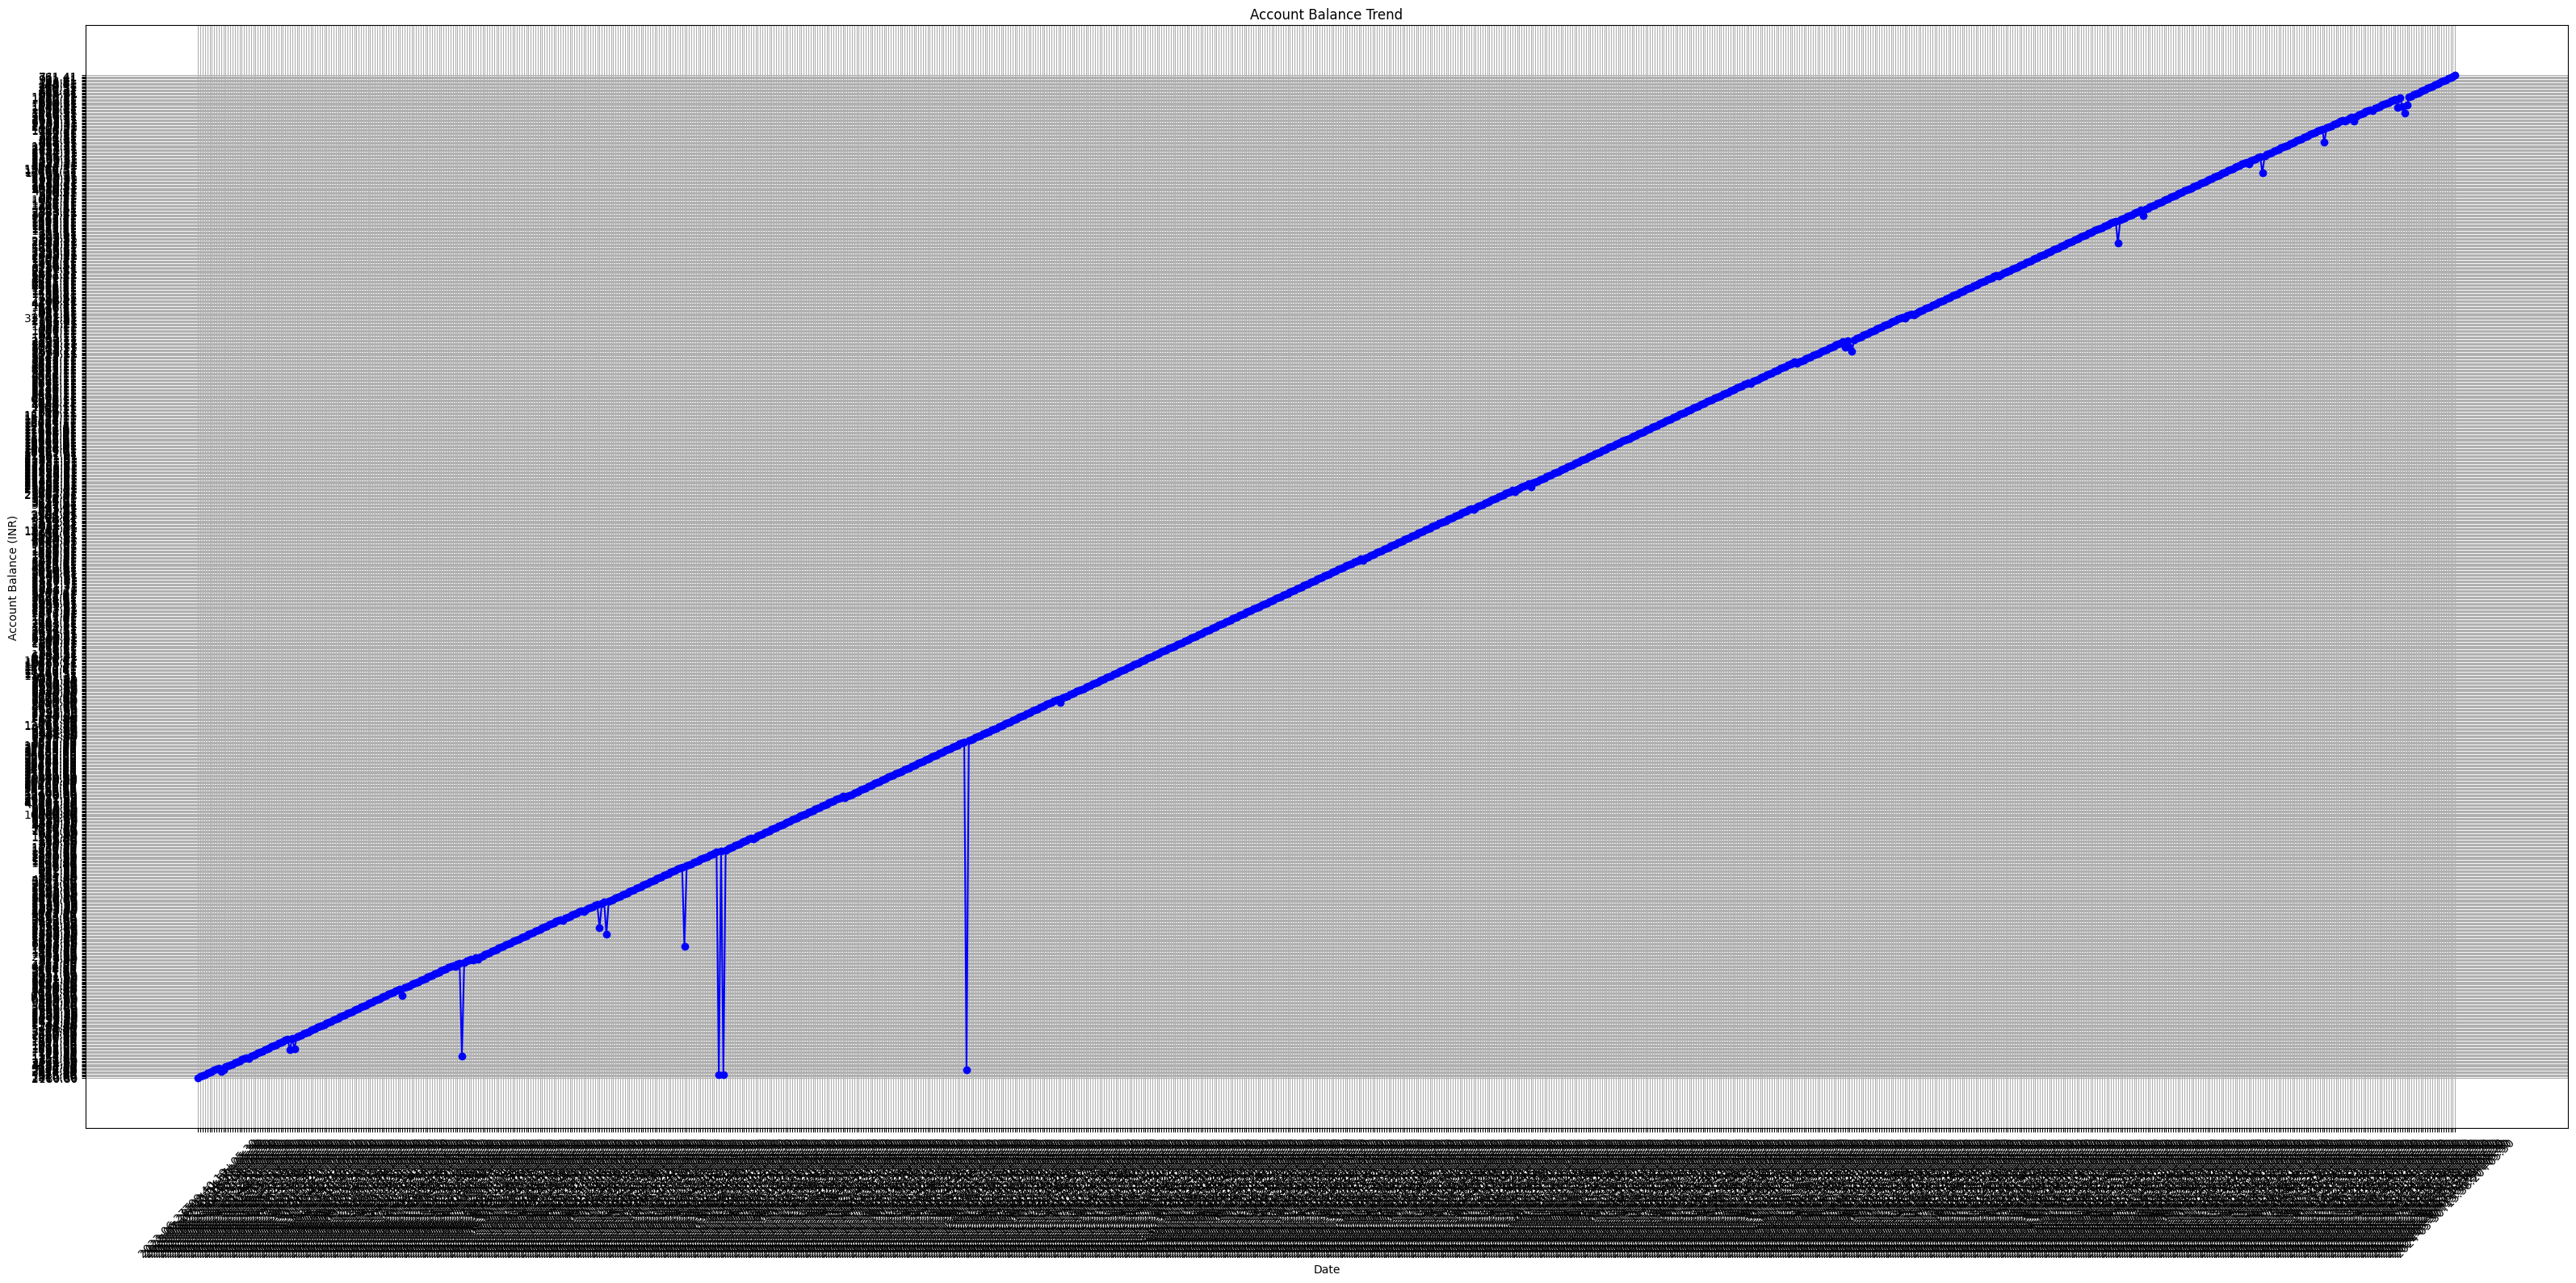

In [35]:
plt.figure(figsize=(32, 16))  # Increase figure size for clarity
plt.plot(df_transactions['transactionTimestamp'], df_transactions['currentBalance'], marker='o', linestyle='-', color='b')
plt.title('Account Balance Trend')
plt.xlabel('Date')
plt.ylabel('Account Balance (INR)')
plt.xticks(rotation=45)
plt.grid(True)  # Add gridlines
plt.tight_layout()
plt.show()

Periods with Significant Changes in Account Balance:
         transactionTimestamp  currentBalance  balanceChange
78  2023-09-14 21:14:51+05:30         6339.80         5500.0
275 2023-11-14 18:31:11+05:30        43892.80        37999.0
277 2023-11-14 18:49:41+05:30        27391.80       -16500.0
285 2023-11-15 17:48:21+05:30        12970.80       -10000.0
291 2023-11-16 15:51:14+05:30        58180.80        45000.0
295 2023-11-17 16:34:54+05:30        35400.80       -21000.0
296 2023-11-17 18:32:29+05:30        30200.80        -5200.0
332 2023-11-29 16:15:33+05:30        16625.80       -19000.0
333 2023-11-29 17:09:47+05:30         3925.80       -12700.0
351 2023-12-05 07:08:30+05:30        13925.80         7560.0
353 2023-12-05 15:50:06+05:30          865.80       -13000.0
535 2024-02-12 13:22:57+05:30        13744.81        10000.0
537 2024-02-13 14:01:51+05:30         3244.81       -10000.0
570 2024-02-24 18:55:15+05:30        23483.91        20000.0
572 2024-02-25 11:08:34+05:30   

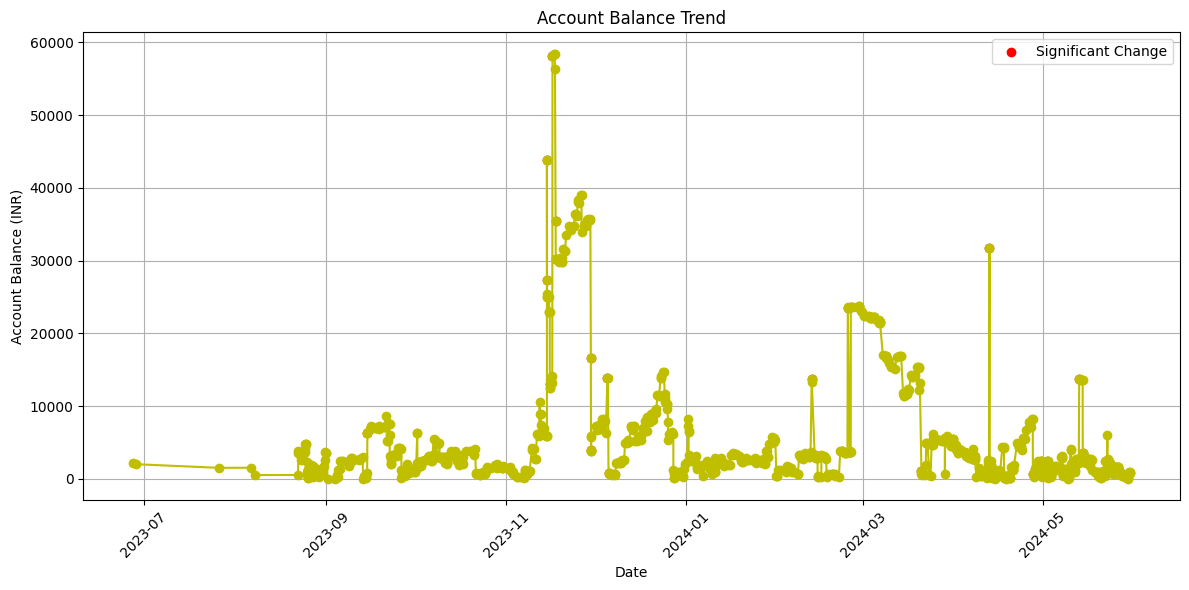

In [51]:
df_transactions['balanceChange'] = df_transactions['currentBalance'].diff()

significant_change_threshold = 5000

# Step 5: Identify periods with significant changes
significant_changes = df_transactions[df_transactions['balanceChange'].abs() > significant_change_threshold]

# Step 6: Print or visualize the identified periods
print("Periods with Significant Changes in Account Balance:")
print(significant_changes[['transactionTimestamp', 'currentBalance', 'balanceChange']])

# Optional: Plotting to visualize significant changes (if needed)
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df_transactions['transactionTimestamp'], df_transactions['currentBalance'], marker='o', linestyle='-', color='y')
plt.title('Account Balance Trend')
plt.xlabel('Date')
plt.ylabel('Account Balance (INR)')
plt.xticks(rotation=45)
plt.grid(True)

# Highlight significant changes on the plot
plt.scatter(significant_changes['transactionTimestamp'], significant_changes['currentBalance'], color='red', label='Significant Change')
plt.legend()

plt.tight_layout()
plt.show()

In [53]:
expense_categories = df_transactions['mode'].str.lower().unique()

# Print the identified expense categories
print("Main Categories of Expenses:")
for category in expense_categories:
    print(category)

Main Categories of Expenses:
card
others
atm
upi
cash


mode
UPI       789
OTHERS    188
CARD        4
ATM         3
CASH        1
Name: count, dtype: int64


Text(0, 0.5, 'Count')

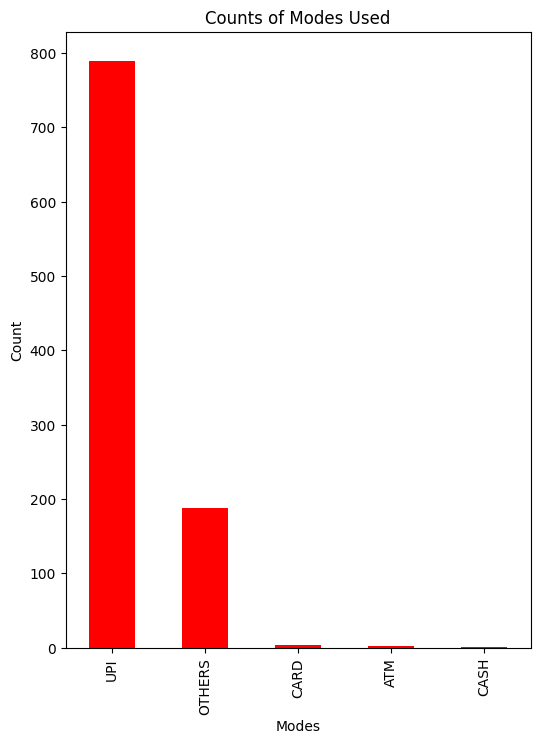

In [58]:
mode_counts=df_transactions['mode'].value_counts()
print(mode_counts)
plt.figure(figsize=(6,8))
mode_counts.plot(kind='bar', color='red')
plt.title("Counts of Modes Used")
plt.xlabel("Modes")
plt.ylabel("Count")

In [64]:
df_credits = df_transactions[df_transactions['type'] == 'CREDIT']

# Count the number of credit transactions
credit_counts = df_credits['type'].value_counts()

# Print the counts
print("Number of Credit Transactions:")
print(credit_counts)

Number of Credit Transactions:
type
CREDIT    290
Name: count, dtype: int64


In [65]:
import pandas as pd

# Assuming df_transactions is already loaded with your transaction data

# Filter transactions where type is CREDIT
df_credits = df_transactions[df_transactions['type'] == 'CREDIT']

# Count the number of different modes of credit transactions
credit_mode_counts = df_credits['mode'].value_counts()

# Print the counts
print("Number of Different Modes of Credit Transactions:")
print(credit_mode_counts)


Number of Different Modes of Credit Transactions:
mode
OTHERS    188
UPI       101
CASH        1
Name: count, dtype: int64


Text(0, 0.5, 'Count')

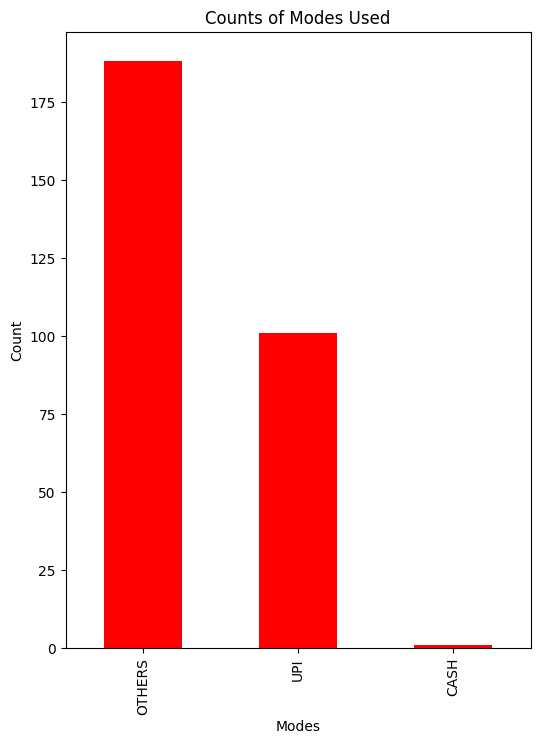

In [66]:
plt.figure(figsize=(6,8))
credit_mode_counts.plot(kind='bar', color='red')
plt.title("Counts of Modes Used")
plt.xlabel("Modes")
plt.ylabel("Count")

Income Patterns:
            count        sum         mean  median
year_month                                       
2023-08        24   12679.00   528.291667   440.0
2023-09        29   22605.00   779.482759   450.0
2023-10        31   21472.00   692.645161   400.0
2023-11        35  115737.00  3306.771429   600.0
2023-12        32   37953.51  1186.047188   825.0
2024-01        27   22127.00   819.518519   550.0
2024-02        22   63782.00  2899.181818   320.0
2024-03        26   25420.00   977.692308   285.0
2024-04        32   58660.00  1833.125000   740.0
2024-05        32   40135.00  1254.218750   650.0


C:\Users\ASUS\AppData\Local\Temp\ipykernel_24316\1641000720.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_credits['year_month'] = df_credits['transactionTimestamp'].dt.to_period('M')
C:\Users\ASUS\AppData\Local\Temp\ipykernel_24316\1641000720.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_credits['year_month'] = df_credits['transactionTimestamp'].dt.to_period('M')


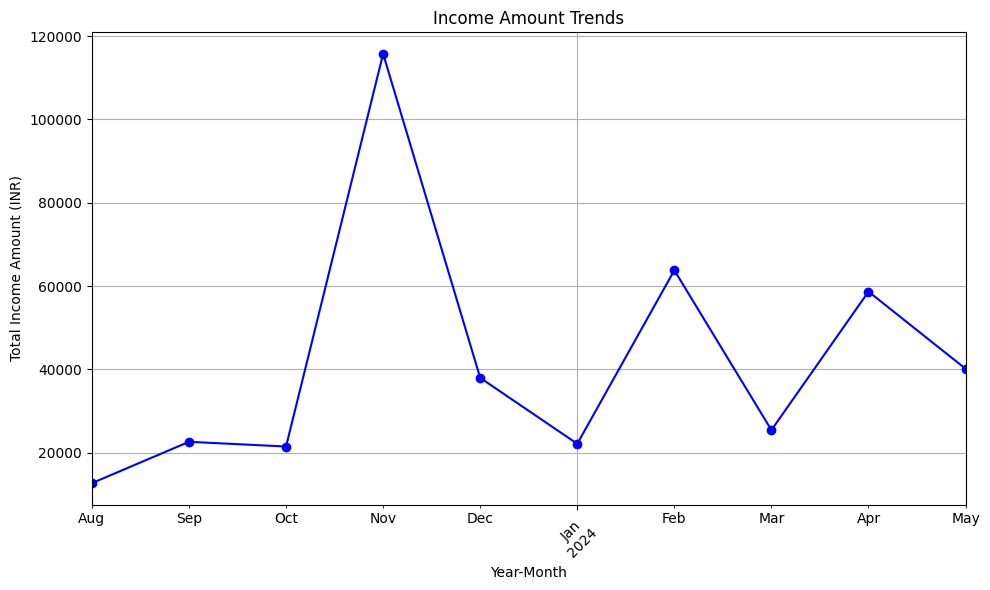

In [67]:
df_credits['year_month'] = df_credits['transactionTimestamp'].dt.to_period('M')

# Group by year and month, and aggregate amount statistics
income_patterns = df_credits.groupby('year_month')['amount'].agg(['count', 'sum', 'mean', 'median'])

# Print or visualize the patterns
print("Income Patterns:")
print(income_patterns)

# Plotting the income amount trends over time
plt.figure(figsize=(10, 6))
income_patterns['sum'].plot(kind='line', marker='o', color='blue')
plt.title('Income Amount Trends')
plt.xlabel('Year-Month')
plt.ylabel('Total Income Amount (INR)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [74]:
mean_amount = df_transactions['amount'].mean()
std_amount = df_transactions['amount'].std()

# Define threshold for suspicious transactions (e.g., 3 standard deviations from the mean)
threshold = mean_amount + 3 * std_amount

# Identify suspicious transactions
suspicious_transactions = df_transactions[df_transactions['amount'] > threshold]

# Print or log suspicious transactions
print("Suspicious Transactions:")
print(suspicious_transactions)

Suspicious Transactions:
       type    mode   amount  currentBalance      transactionTimestamp  \
275  CREDIT     UPI  37999.0        43892.80 2023-11-14 18:31:11+05:30   
277   DEBIT     UPI  16500.0        27391.80 2023-11-14 18:49:41+05:30   
285   DEBIT     UPI  10000.0        12970.80 2023-11-15 17:48:21+05:30   
291  CREDIT    CASH  45000.0        58180.80 2023-11-16 15:51:14+05:30   
295   DEBIT     UPI  21000.0        35400.80 2023-11-17 16:34:54+05:30   
332   DEBIT     UPI  19000.0        16625.80 2023-11-29 16:15:33+05:30   
333   DEBIT     UPI  12700.0         3925.80 2023-11-29 17:09:47+05:30   
353   DEBIT     UPI  13000.0          865.80 2023-12-05 15:50:06+05:30   
535  CREDIT     UPI  10000.0        13744.81 2024-02-12 13:22:57+05:30   
537   DEBIT     ATM  10000.0         3244.81 2024-02-13 14:01:51+05:30   
570  CREDIT     UPI  20000.0        23483.91 2024-02-24 18:55:15+05:30   
572   DEBIT     UPI  20000.0         3683.91 2024-02-25 11:08:34+05:30   
576  CREDIT  

In [69]:
mean_amount

np.float64(855.4928020304569)

In [71]:
std_amount

np.float64(3007.515099807174)

In [72]:
threshold

np.float64(9878.03810145198)

Alerts for Low Balance Periods:
         transactionTimestamp  currentBalance
4   2023-08-07 17:13:13+05:30          525.80
5   2023-08-22 08:05:06+05:30          524.80
18  2023-08-25 10:39:35+05:30          794.80
19  2023-08-25 12:03:11+05:30          674.80
26  2023-08-25 16:56:59+05:30          175.80
..                        ...             ...
980 2024-05-29 17:57:40+05:30           23.41
981 2024-05-30 05:07:05+05:30          961.41
982 2024-05-30 09:58:24+05:30          901.41
983 2024-05-30 13:30:30+05:30          771.41
984 2024-05-30 13:38:20+05:30          761.41

[209 rows x 2 columns]

Alerts for High Expenditure Periods:
         transactionTimestamp  amount
4   2023-08-07 17:13:13+05:30  1000.0
6   2023-08-22 11:49:13+05:30  3000.0
8   2023-08-23 08:17:48+05:30  1200.0
14  2023-08-24 18:22:22+05:30   750.0
17  2023-08-25 10:24:38+05:30  2480.0
..                        ...     ...
948 2024-05-24 19:33:51+05:30   600.0
950 2024-05-25 07:47:07+05:30   600.0
954 2024-05-

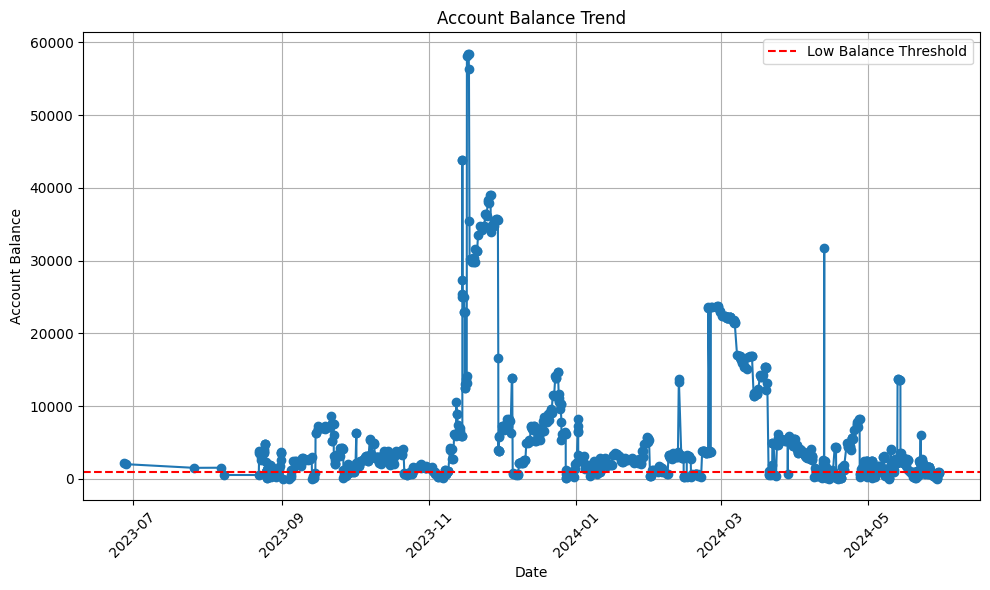

In [75]:
low_balance_threshold = 1000  # Example threshold for low balance
high_expenditure_threshold = 500  # Example threshold for high expenditure

# Identify periods with low balance
low_balance_periods = df_transactions[df_transactions['currentBalance'] < low_balance_threshold]

# Identify periods with high expenditure
high_expenditure_periods = df_transactions[df_transactions['amount'] > high_expenditure_threshold]

# Print or log alerts for low balance periods
print("Alerts for Low Balance Periods:")
print(low_balance_periods[['transactionTimestamp', 'currentBalance']])

# Print or log alerts for high expenditure periods
print("\nAlerts for High Expenditure Periods:")
print(high_expenditure_periods[['transactionTimestamp', 'amount']])

# Visualize account balance trend
plt.figure(figsize=(10, 6))
plt.plot(df_transactions['transactionTimestamp'], df_transactions['currentBalance'], marker='o', linestyle='-')
plt.axhline(y=low_balance_threshold, color='r', linestyle='--', label='Low Balance Threshold')
plt.title('Account Balance Trend')
plt.xlabel('Date')
plt.ylabel('Account Balance')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Alerts for High Expenditure (Debit Transactions):
         transactionTimestamp   amount  currentBalance
277 2023-11-14 18:49:41+05:30  16500.0        27391.80
285 2023-11-15 17:48:21+05:30  10000.0        12970.80
295 2023-11-17 16:34:54+05:30  21000.0        35400.80
296 2023-11-17 18:32:29+05:30   5200.0        30200.80
332 2023-11-29 16:15:33+05:30  19000.0        16625.80
333 2023-11-29 17:09:47+05:30  12700.0         3925.80
353 2023-12-05 15:50:06+05:30  13000.0          865.80
537 2024-02-13 14:01:51+05:30  10000.0         3244.81
572 2024-02-25 11:08:34+05:30  20000.0         3683.91
648 2024-03-20 18:56:48+05:30  12000.0         1119.11
744 2024-04-12 20:50:06+05:30  30000.0         1701.21
794 2024-04-27 13:08:14+05:30   7500.0          730.21
889 2024-05-14 11:51:56+05:30  10000.0         3584.31


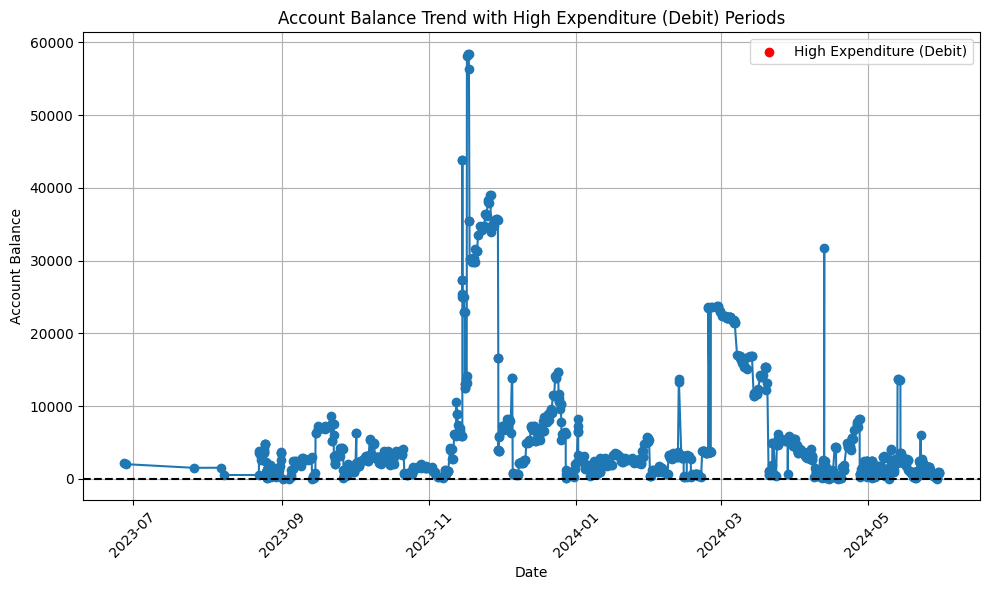

In [77]:
high_expenditure_threshold = 5000  # Example threshold for high expenditure in debit transactions

# Filter for debit transactions with high expenditure
high_expenditure_debits = df_transactions[(df_transactions['type'] == 'DEBIT') & (df_transactions['amount'] > high_expenditure_threshold)]

# Print or log alerts for high expenditure debit transactions
print("Alerts for High Expenditure (Debit Transactions):")
print(high_expenditure_debits[['transactionTimestamp', 'amount', 'currentBalance']])

# Visualize account balance trend with high expenditure periods marked
plt.figure(figsize=(10, 6))
plt.plot(df_transactions['transactionTimestamp'], df_transactions['currentBalance'], marker='o', linestyle='-',)
plt.scatter(high_expenditure_debits['transactionTimestamp'], high_expenditure_debits['currentBalance'], color='red', label='High Expenditure (Debit)')
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Account Balance Trend with High Expenditure (Debit) Periods')
plt.xlabel('Date')
plt.ylabel('Account Balance')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [81]:
threshold_low_balance=500
low_balance= df_transactions[(df_transactions['currentBalance']< threshold_low_balance)]
low_balance[['transactionTimestamp', 'currentBalance']]

,transactionTimestamp,currentBalance
26,2023-08-25 16:56:59+05:30,175.80
27,2023-08-25 18:23:59+05:30,145.80
28,2023-08-25 18:37:02+05:30,196.80
29,2023-08-26 15:06:16+05:30,195.80
36,2023-08-27 12:19:54+05:30,315.80
...,...,...
976,2024-05-29 08:53:10+05:30,178.41
977,2024-05-29 12:01:51+05:30,48.41
978,2024-05-29 17:10:42+05:30,348.41
979,2024-05-29 17:12:19+05:30,103.41


Alerts for Low Balance Transactions:
         transactionTimestamp  amount  currentBalance
51  2023-09-01 10:42:42+05:30  3500.0            0.80
52  2023-09-03 18:19:09+05:30    34.0           34.80
73  2023-09-13 10:19:32+05:30  3000.0           29.80
243 2023-11-06 20:57:40+05:30   105.0           86.80
739 2024-04-11 22:54:14+05:30   220.0           62.21
749 2024-04-14 18:04:34+05:30   150.0            1.21
763 2024-04-18 13:09:44+05:30   130.0           36.21
864 2024-05-09 15:52:11+05:30   900.0           19.21
865 2024-05-09 19:38:29+05:30    50.0           69.21
866 2024-05-09 21:44:12+05:30    19.0           50.21
924 2024-05-20 17:26:51+05:30   130.0           49.31
977 2024-05-29 12:01:51+05:30   130.0           48.41
980 2024-05-29 17:57:40+05:30    80.0           23.41


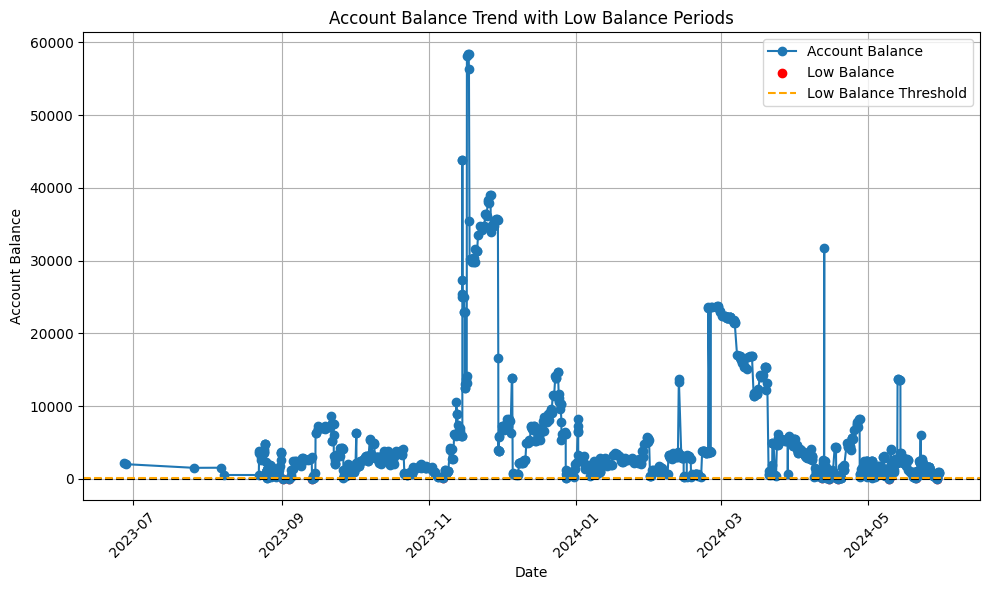

In [8]:

import matplotlib.pyplot as plt

low_balance_threshold = 100

# Filter for transactions with low balance
low_balance_alerts = df_transactions[df_transactions['currentBalance'] < low_balance_threshold]

# Print or log alerts for low balance transactions
print("Alerts for Low Balance Transactions:")
print(low_balance_alerts[['transactionTimestamp', 'amount', 'currentBalance']])

# Visualize account balance trend with low balance periods marked
plt.figure(figsize=(10, 6))
plt.plot(df_transactions['transactionTimestamp'], df_transactions['currentBalance'], marker='o', linestyle='-', label='Account Balance')
plt.scatter(low_balance_alerts['transactionTimestamp'], low_balance_alerts['currentBalance'], color='red', label='Low Balance')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=low_balance_threshold, color='orange', linestyle='--', label='Low Balance Threshold')
plt.title('Account Balance Trend with Low Balance Periods')
plt.xlabel('Date')
plt.ylabel('Account Balance')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()





















In [12]:
df_transactions['currentBalance'].describe()

count      985.000000
mean      5901.308721
std       8670.950436
min          0.800000
25%       1174.800000
50%       2723.110000
75%       5834.110000
max      58450.800000
Name: currentBalance, dtype: float64